In [1]:
import numpy as np
rand = np.random.RandomState(42)
       
x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [2]:
#three different elements
[x[3], x[7], x[2]]

[71, 86, 14]

In [3]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

In [4]:
#the shape of the result reflects the shape of the 
#index arrays rather than the shape of the array being indexed
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [5]:
#it also works in multiple dimensions
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [6]:
#the first index refers to the row, and the second to the column:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [7]:
#combining rows and vectors to give a multidimensionl array
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [8]:
 row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

In [10]:
#Combined Indexing
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [11]:
 X[2, [2, 0, 1]]


array([10,  8,  9])

In [12]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]


array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [13]:
#selecting random points
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape


(100, 2)

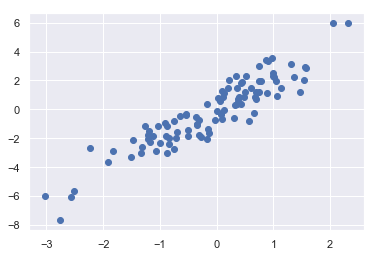

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling
        
plt.scatter(X[:, 0], X[:, 1]);

In [16]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices


array([77, 28, 46, 69, 34, 90,  5, 19, 36, 51, 15,  3, 54, 24, 96, 64, 29,
        7, 17, 97])

In [17]:
selection = X[indices]  # fancy indexing here
selection.shape


(20, 2)

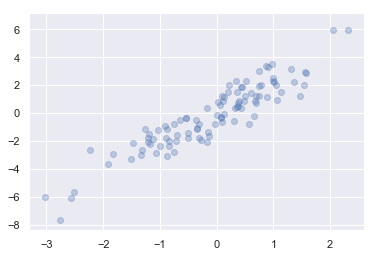

In [18]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='none', s=200);

In [19]:
#modifying values with fancy indexing
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99

print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [20]:
x[i] -= 10
print(x)


[ 0 89 89  3 89  5  6  7 89  9]


In [21]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]

print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [22]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x


array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [23]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


In [24]:
#Binning Data
np.random.seed(42)
x = np.random.randn(100)
        # compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)
# find the appropriate bin for each x
i = np.searchsorted(bins, x)
        # add 1 to each of these bins
np.add.at(counts, i, 1) 

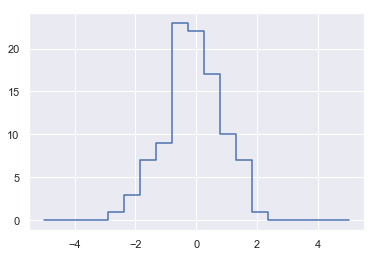

In [25]:
# plot the results
plt.plot(bins, counts, linestyle='steps');


In [26]:
 print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)
 print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)



NumPy routine:
50.6 µs ± 4.94 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
34.4 µs ± 1.71 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [27]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)
        
print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)


NumPy routine:
146 ms ± 2.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
255 ms ± 11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
